### **KLASIFIKASI EMOSI**

Data diri : Ruhan Masykuri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
zip_dir = '/content/drive/MyDrive/Colab Notebooks/data/emotion_in_text.zip'
zip = zipfile.ZipFile( zip_dir, 'r')
zip.extractall('/tmp/')
zip.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Colab Notebooks/data/emotion_in_text.zip' mode='r'>>

In [ ]:
df = pd.read_csv('/tmp/Emotion_final.csv')
print(df.info())
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB
None


<bound method NDFrame.head of                                                     Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
21454               Melissa stared at her friend in dism     fear
21455  Successive state elections have seen the gover...     fear
21456               Vincent was irritated but not dismay     fear
21457  Kendall-Hume turned back to face the dismayed ...     fear
21458                    I am dismayed , but not surpris     fear

[21459 rows x 2 columns]>

In [ ]:
emosi = set(df.Emotion)
emosi = list(emosi)
type(emosi)

list

In [ ]:
kategori = pd.get_dummies(df.Emotion)
kategori

,anger,fear,happy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
21454,0,1,0,0,0,0
21455,0,1,0,0,0,0
21456,0,1,0,0,0,0
21457,0,1,0,0,0,0


In [ ]:
new_df = pd.concat([df, kategori], axis=1)
new_df = new_df.drop(columns='Emotion')

In [ ]:
text = new_df['Text'].values
label = new_df[emosi].values

In [ ]:
text_train, text_test, label_train, label_test = train_test_split(text, label, train_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [ ]:
model2 = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(6, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.8):
      print("\nAkurasi telah mencapai >80%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs =50
history = model2.fit(
    padded_train, label_train, epochs=num_epochs,
    validation_data=(padded_test, label_test), verbose=2, batch_size=16, callbacks=[callbacks])

Epoch 1/50
269/269 - 60s - loss: 1.5842 - accuracy: 0.3319 - val_loss: 1.4833 - val_accuracy: 0.3447 - 60s/epoch - 222ms/step
Epoch 2/50
269/269 - 18s - loss: 1.2527 - accuracy: 0.4519 - val_loss: 1.3373 - val_accuracy: 0.4964 - 18s/epoch - 67ms/step
Epoch 3/50
269/269 - 17s - loss: 0.8086 - accuracy: 0.6730 - val_loss: 1.1224 - val_accuracy: 0.6096 - 17s/epoch - 65ms/step
Epoch 4/50
269/269 - 18s - loss: 0.5648 - accuracy: 0.7756 - val_loss: 1.0174 - val_accuracy: 0.6751 - 18s/epoch - 66ms/step
Epoch 5/50
269/269 - 18s - loss: 0.3484 - accuracy: 0.8702 - val_loss: 1.1261 - val_accuracy: 0.6851 - 18s/epoch - 67ms/step
Epoch 6/50
269/269 - 18s - loss: 0.2253 - accuracy: 0.9191 - val_loss: 1.1167 - val_accuracy: 0.7196 - 18s/epoch - 67ms/step
Epoch 7/50
269/269 - 17s - loss: 0.1804 - accuracy: 0.9385 - val_loss: 1.1886 - val_accuracy: 0.7141 - 17s/epoch - 65ms/step
Epoch 8/50
269/269 - 18s - loss: 0.1331 - accuracy: 0.9513 - val_loss: 1.3559 - val_accuracy: 0.7178 - 18s/epoch - 67ms/step

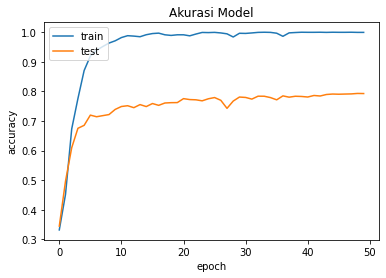

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

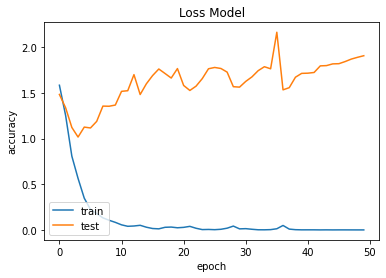

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()